In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/raw/train_test.csv", parse_dates=True, dayfirst=False)
df.head()

,store_id,week_start,area_hier_desc,division_hier_desc,store_geography,carpark,soc_name,total_items,idle_hours,total_on_till_hours,total_transaction_count
0,124,2020-05-17,NORTHERN IRELAND REGION,IRELAND,NORTHERN IRELAND,1.0,SIMPLY FOOD,66943,56.657500,162.705556,7275
1,130,2020-01-26,MANCHESTER,NORTH,LANCASHIRE & CUMBRIA,0.0,LARGE - HIGH STREET,67949,64.993056,187.373333,9460
2,135,2019-11-17,MERSEYSIDE,NORTH,"MERSEYSIDE, NORTH WALES & IOM",1.0,MEDIUM - RETAIL PARK,45570,36.532222,118.333333,5812
3,136,2020-09-27,HOME COUNTIES SOUTH,SOUTH,HOME COUNTIES SOUTH,1.0,MAJOR - RETAIL PARK,131658,80.551944,326.306944,9168
4,176,2021-05-23,"NORTH WALES, CHESHIRE & IOM",CENTRAL,"MERSEYSIDE, NORTH WALES & IOM",1.0,MEDIUM - RETAIL PARK,56307,57.786111,149.586111,5671


In [3]:
df.week_start = pd.to_datetime(df.week_start, dayfirst=False)

In [4]:
df.dtypes

store_id                            int64
week_start                 datetime64[ns]
area_hier_desc                     object
division_hier_desc                 object
store_geography                    object
carpark                           float64
soc_name                           object
total_items                         int64
idle_hours                        float64
total_on_till_hours               float64
total_transaction_count             int64
dtype: object

In [5]:
sns.set()

<AxesSubplot:xlabel='week_start', ylabel='total_on_till_hours'>

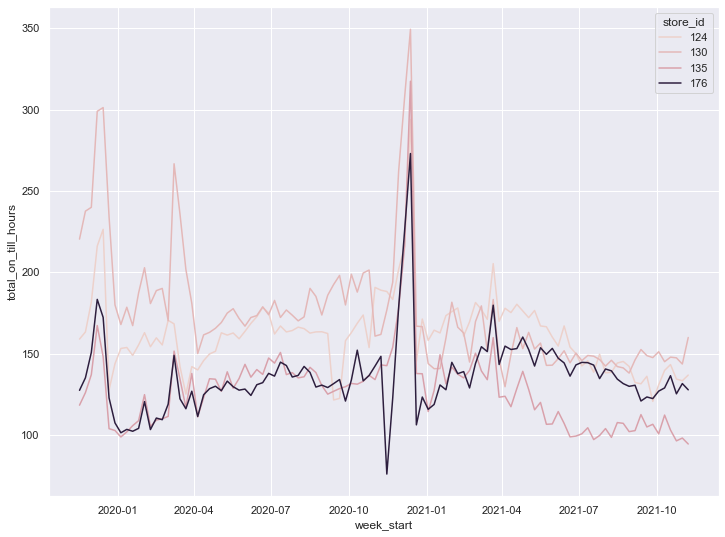

In [6]:
plt.figure(figsize=(12, 9))
sns.lineplot(x="week_start", y="total_on_till_hours", hue="store_id", data=df[df.store_id.isin([124, 130, 135, 176])])

In [7]:
df_test = df.copy()[df.store_id == 71]

## ACF and PACF in order to look at the AR and MA terms

In [8]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

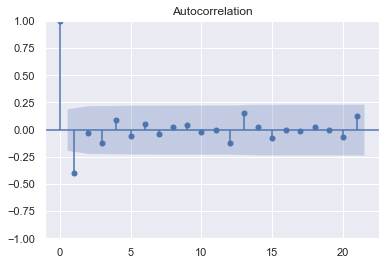

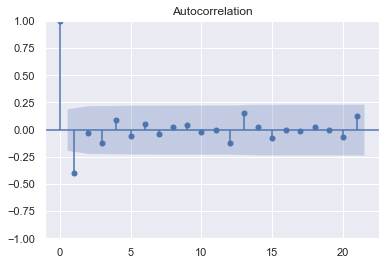

In [9]:
plot_acf(df_test.total_on_till_hours.apply(np.log10).diff().dropna())

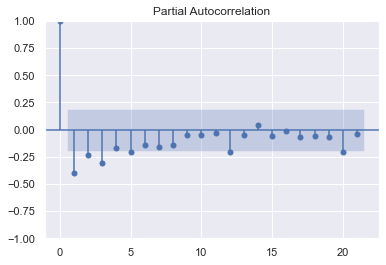

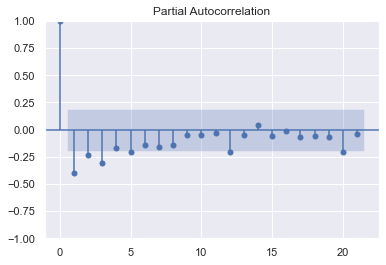

In [10]:
plot_pacf(df_test.total_on_till_hours.apply(np.log).diff().dropna(), method="ywm")

In [12]:
df.nunique()

store_id                     600
week_start                   104
area_hier_desc                32
division_hier_desc             4
store_geography               31
carpark                        2
soc_name                      11
total_items                43977
idle_hours                 53267
total_on_till_hours        57142
total_transaction_count    12868
dtype: int64

In [13]:
areas = list(df.area_hier_desc.unique())

In [14]:
print(areas)

['NORTHERN IRELAND REGION', 'MANCHESTER', 'MERSEYSIDE', 'HOME COUNTIES SOUTH', 'NORTH WALES, CHESHIRE & IOM', 'CENTRAL LONDON', 'SCOTLAND NORTH', 'SOUTH MIDLANDS', 'NORTH YORKSHIRE', 'NORTH EAST', 'SCOTLAND WEST', 'SOUTH YORKSHIRE', 'BRISTOL & BATH', 'SOUTH WEST LONDON', 'LANCASHIRE & CUMBRIA', 'SOUTH EAST LONDON', 'SOUTH WEST', 'NORTH EAST LONDON', 'EAST ANGLIA', 'LEEDS', 'SCOTLAND CENTRAL & EAST', 'STAFFORDSHIRE & DERBYSHIRE', 'CENTRAL WEST', 'SOUTH COAST WEST', 'BIRMINGHAM', 'SOUTH EAST', 'CENTRAL EAST', 'SOUTH WALES', 'SOUTH COAST EAST', 'HOME COUNTIES NORTH', 'ROI REGION', 'NORTH WEST LONDON']


In [15]:
df[df.store_id == 6224].sort_values(by="week_start")

,store_id,week_start,area_hier_desc,division_hier_desc,store_geography,carpark,soc_name,total_items,idle_hours,total_on_till_hours,total_transaction_count
44687,6224,2019-11-17,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,64048,83.513056,197.495556,9081
17984,6224,2019-11-24,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,63734,81.790833,196.380000,8827
5524,6224,2019-12-01,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,61984,84.603056,198.947222,9497
11698,6224,2019-12-08,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,79033,95.141389,237.714167,9529
8140,6224,2019-12-15,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,75922,82.230833,226.433611,7552
...,...,...,...,...,...,...,...,...,...,...,...
3990,6224,2021-10-10,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,66855,62.446667,175.444722,8453
54242,6224,2021-10-17,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,63492,60.496667,167.567500,8548
41682,6224,2021-10-24,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,65871,60.666111,171.783889,8524
25259,6224,2021-10-31,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,64587,56.654167,166.025556,8512


In [16]:
df[df.week_start >= pd.to_datetime("2021-11-07")].store_id.nunique()

563

In [17]:
print(set(df.store_id.unique()) - set(df[df.week_start >= pd.to_datetime("2021-11-07")].store_id.unique()))

{8332, 1296, 3094, 2969, 6554, 1436, 4637, 4381, 1821, 1568, 1067, 7980, 3887, 7223, 8125, 7870, 6211, 3269, 2119, 73, 9674, 2123, 9548, 7883, 2257, 5597, 9438, 6376, 2153, 4077, 111, 1010, 116, 1012, 8950, 247, 1407}


In [18]:
closed_stores = list(set(df.store_id.unique()) - set(df[df.week_start >= pd.to_datetime("2021-11-07")].store_id.unique()))

In [19]:
df_actual = df[~df.store_id.isin(closed_stores)]

In [20]:
df_actual.shape

(57715, 11)

In [21]:
df_manchester  = df_actual.copy()[df_actual.area_hier_desc == "MANCHESTER"]

In [22]:
manchester_stores = df_manchester.store_id.tolist()

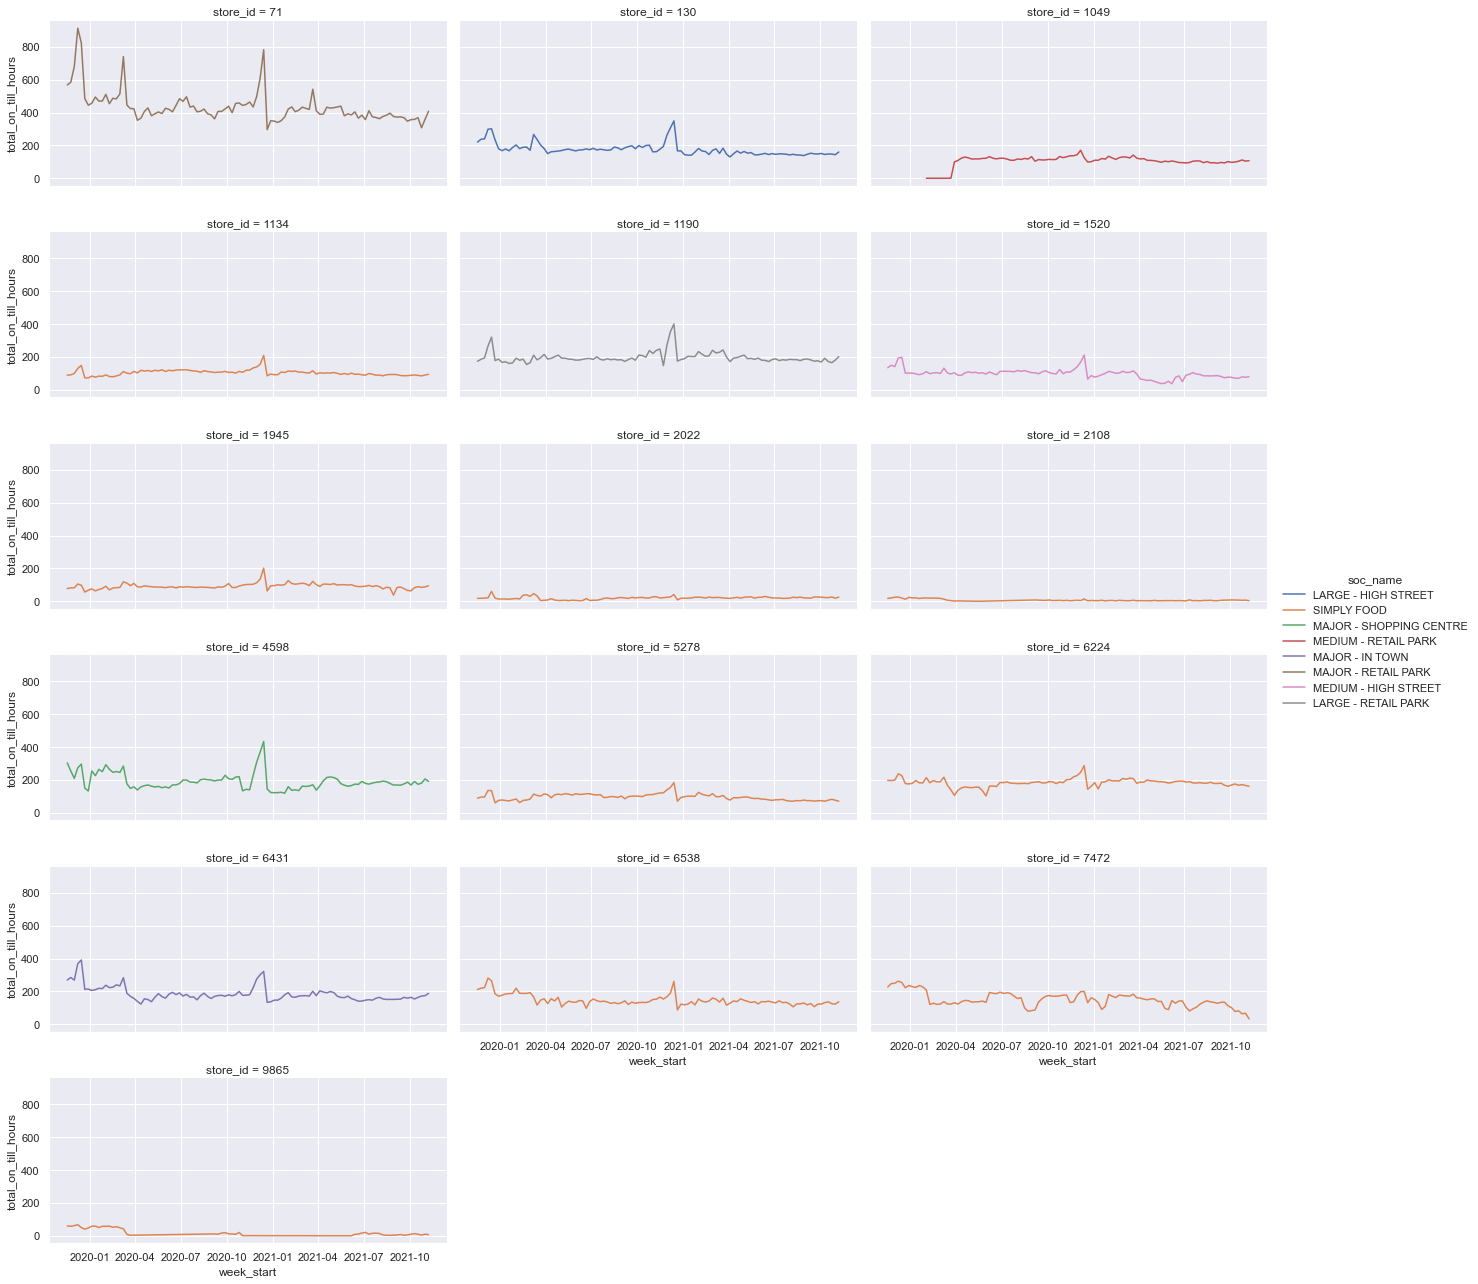

In [23]:
g = sns.FacetGrid(df_manchester, col="store_id", hue="soc_name", col_wrap=3, aspect=2)
g.map(sns.lineplot, "week_start", "total_on_till_hours")
g.add_legend()

In [24]:
df_manchester

,store_id,week_start,area_hier_desc,division_hier_desc,store_geography,carpark,soc_name,total_items,idle_hours,total_on_till_hours,total_transaction_count
1,130,2020-01-26,MANCHESTER,NORTH,LANCASHIRE & CUMBRIA,0.0,LARGE - HIGH STREET,67949,64.993056,187.373333,9460
12,1134,2021-04-04,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",0.0,SIMPLY FOOD,38375,36.785833,103.520556,3540
25,6224,2020-11-01,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,64149,65.615833,183.420833,7448
61,4598,2021-10-24,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,MAJOR - SHOPPING CENTRE,53548,71.676111,180.704444,7771
101,7472,2021-01-10,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,55243,39.466111,132.100556,4843
...,...,...,...,...,...,...,...,...,...,...,...
59170,1190,2021-08-29,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,LARGE - RETAIL PARK,79395,58.140833,185.411389,7013
59177,4598,2021-06-20,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,MAJOR - SHOPPING CENTRE,62514,62.539722,172.893889,7789
59213,1134,2021-09-05,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",0.0,SIMPLY FOOD,34844,32.248056,92.531944,3743
59265,2022,2020-05-24,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",0.0,SIMPLY FOOD,367,5.457500,6.698611,332


In [25]:
df_manchester_pivot = df_manchester.pivot(index="week_start", columns="store_id", values="total_on_till_hours")

In [26]:
df_manchester_pivot

store_id,71,130,1049,1134,1190,1520,1945,2022,2108,4598,5278,6224,6431,6538,7472,9865
week_start,,,,,,,,,,,,,,,,
2019-11-17,568.550000,220.388611,NaN,89.008611,173.779722,134.480833,77.646389,17.738056,17.618611,303.792778,89.461111,197.495556,269.668333,212.348056,227.083056,60.170000
2019-11-24,584.548056,237.562222,NaN,91.159722,185.568889,149.714722,81.716111,18.526667,20.795000,254.756944,95.643889,196.380000,285.045556,219.168056,247.899167,58.251111
2019-12-01,679.730000,239.925833,NaN,98.923889,194.427778,141.173056,82.183889,19.721111,24.945833,210.000556,96.035556,198.947222,269.053056,223.782778,250.014722,62.029722
2019-12-08,913.628056,298.914167,NaN,130.176667,267.210556,193.140556,104.976944,21.285000,25.810278,273.937222,136.315000,237.714167,369.173333,281.758889,262.756667,67.605556
2019-12-15,824.313611,301.223333,NaN,148.506667,320.705000,197.763056,97.860833,60.368889,19.901667,296.902778,134.425278,226.433611,391.588333,264.621111,254.669722,50.167778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-10,358.624444,145.057222,98.935833,90.246667,191.972222,71.164722,83.083611,23.004444,7.796944,190.637222,70.479444,175.444722,154.050000,132.051389,77.939444,13.272222
2021-10-17,368.691111,147.861111,103.517222,87.510000,171.927500,69.731944,88.901944,22.390278,7.284167,173.428333,77.044444,167.567500,164.111389,137.062500,82.229722,9.340833
2021-10-24,307.587778,147.416111,111.383333,84.585278,165.013889,78.470000,84.784167,26.321667,6.275833,180.704444,82.266389,171.783889,172.097222,125.502500,63.909722,4.609167


In [27]:
df_manchester_pivot.dropna(axis=1, inplace=True)

In [28]:
df_manchester_pivot

store_id,71,130,1134,1190,1520,1945,2022,4598,5278,6224,6431,6538,7472
week_start,,,,,,,,,,,,,
2019-11-17,568.550000,220.388611,89.008611,173.779722,134.480833,77.646389,17.738056,303.792778,89.461111,197.495556,269.668333,212.348056,227.083056
2019-11-24,584.548056,237.562222,91.159722,185.568889,149.714722,81.716111,18.526667,254.756944,95.643889,196.380000,285.045556,219.168056,247.899167
2019-12-01,679.730000,239.925833,98.923889,194.427778,141.173056,82.183889,19.721111,210.000556,96.035556,198.947222,269.053056,223.782778,250.014722
2019-12-08,913.628056,298.914167,130.176667,267.210556,193.140556,104.976944,21.285000,273.937222,136.315000,237.714167,369.173333,281.758889,262.756667
2019-12-15,824.313611,301.223333,148.506667,320.705000,197.763056,97.860833,60.368889,296.902778,134.425278,226.433611,391.588333,264.621111,254.669722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-10,358.624444,145.057222,90.246667,191.972222,71.164722,83.083611,23.004444,190.637222,70.479444,175.444722,154.050000,132.051389,77.939444
2021-10-17,368.691111,147.861111,87.510000,171.927500,69.731944,88.901944,22.390278,173.428333,77.044444,167.567500,164.111389,137.062500,82.229722
2021-10-24,307.587778,147.416111,84.585278,165.013889,78.470000,84.784167,26.321667,180.704444,82.266389,171.783889,172.097222,125.502500,63.909722


In [2]:
from statsmodels.tsa.api import VAR

In [30]:
data = np.log(df_manchester_pivot).diff().dropna()

In [31]:
model = VAR(data, freq='W')

In [32]:
results = model.fit(1)

In [33]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 24, Mar, 2022
Time:                     15:44:04
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                   -50.4912
Nobs:                     102.000    HQIC:                  -53.2783
Log likelihood:           1114.41    FPE:                1.11599e-24
AIC:                     -55.1750    Det(Omega_mle):     2.09657e-25
--------------------------------------------------------------------
Results for equation 71
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.002945         0.015463           -0.190           0.849
L1.71          -0.136771         0.224292           -0.610           0.542
L1.130         -0.349214         0.211681           -1.650           0.099
L1.1134     

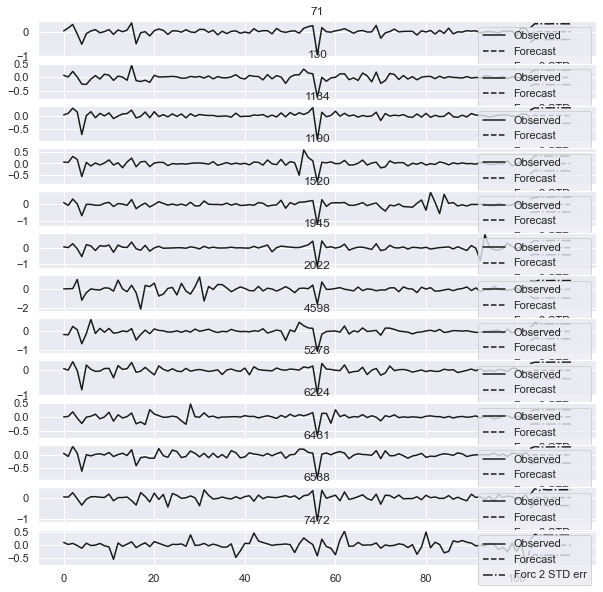

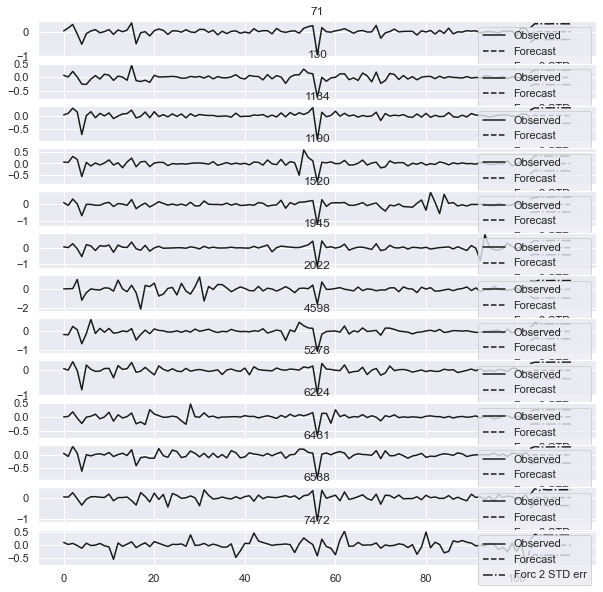

In [34]:
results.plot_forecast(10, )

In [9]:
df_2 = pd.read_csv("../data/processed/cl2_pivot.csv")

In [11]:
df_2.set_index("week_start", inplace=True)

In [12]:
data = np.log(df_2).diff().dropna()


In [13]:
model = VAR(data, freq='W')


In [20]:
results = model.fit(1)

In [27]:
df_new = pd.DataFrame(columns=df_2.columns)

In [33]:
df_new.loc[0] = results.forecast(df_2.values[-1:], 1)[0]

In [34]:
df_new

,55,71,97,136,152,165,294,301,343,369,...,3803,3926,4132,4417,5429,6156,6460,6473,6952,7362
0,-5.462491,-31.203107,3.103402,41.282665,98.104036,-44.599061,-97.913032,-48.670076,58.279689,-12.842287,...,-52.494631,-30.992023,44.301716,-4.019769,70.163877,-22.923063,-10.850804,136.356638,7.477102,48.314458


In [31]:
results.forecast(df_2.values[-1:], 1)[0].r§eshape(-1, 1)

array([[ -5.46249078],
       [-31.20310661],
       [  3.10340195],
       [ 41.28266497],
       [ 98.10403627],
       [-44.59906058],
       [-97.91303209],
       [-48.67007578],
       [ 58.27968949],
       [-12.84228704],
       [118.94647392],
       [  3.93054917],
       [-39.58962446],
       [ 33.16374086],
       [ 73.70143758],
       [ -2.97997633],
       [ -0.59070175],
       [ -0.87639441],
       [-75.59030101],
       [-52.49463131],
       [-30.99202257],
       [ 44.30171561],
       [ -4.01976867],
       [ 70.16387738],
       [-22.923063  ],
       [-10.85080364],
       [136.35663828],
       [  7.47710211],
       [ 48.31445776]])

In [25]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 24, Mar, 2022
Time:                     16:01:40
--------------------------------------------------------------------
No. of Equations:         29.0000    BIC:                   -124.383
Nobs:                     102.000    HQIC:                  -137.706
Log likelihood:           4158.18    FPE:                3.04069e-64
AIC:                     -146.772    Det(Omega_mle):     1.72081e-67
--------------------------------------------------------------------
Results for equation 55
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.001751         0.017571           -0.100           0.921
L1.55          -0.351414         0.151482           -2.320           0.020
L1.71           0.109782         0.305083            0.360           0.719
L1.97       